# Time Series-Based Risk Analysis App for Cryptocurrency Trading

## Overview
As the cryptocurrency market grows, investors face increasing challenges in making informed trading decisions. Our proposed application, CryptoRisk Analyzer, aims to provide a comprehensive risk analysis tool for the top trading cryptocurrencies. By leveraging time series forecasting and machine learning metrics, this app will help users compare cryptocurrencies and assess their potential risks before making investment decisions.

## Key Features
1. Time Series Analysis: Utilize historical price data for top cryptocurrencies (e.g., Bitcoin, Ethereum, Cardano) to identify trends, seasonality, and volatility. This will form the basis for forecasting future prices.
2. Machine Learning Integration: Implement machine learning models, such as ARIMA, LSTM, and regression analysis, to predict future price movements. Metrics such as Mean Squared Error (MSE) will measure the accuracy of these predictions, allowing users to gauge the reliability of forecasts.
3. Risk Assessment Metrics: Calculate risk factors based on volatility, drawdowns, and historical performance. Provide users with an intuitive risk score for each cryptocurrency, helping them to evaluate their risk tolerance.
4. Cryptocurrency Comparison: Users can select two cryptocurrencies for side-by-side comparison. The app will generate a comprehensive report detailing the predicted price movements, risk assessments, and machine learning accuracy metrics (e.g., MSE).
5. User-Friendly Interface: A web-based application with an intuitive UI will allow users to easily navigate through different cryptocurrencies, access analysis reports, and visualize historical trends through interactive graphs and charts.

## Benefits
* Informed Decision-Making: Equip investors with the necessary tools and insights to make well-informed trading decisions, potentially leading to higher returns.
* Real-Time Updates: Continuous data analysis and updates ensure users receive the most current insights based on market fluctuations.
* Risk Management: Help users understand and mitigate risks associated with cryptocurrency investments, enhancing their overall investment strategy.

## Target Audience
1. Individual investors looking to optimize their cryptocurrency portfolios.
2. Financial advisors and analysts seeking reliable tools for crypto asset evaluation.
3. Educational platforms aiming to teach risk analysis and investment strategies in the cryptocurrency space.


In [89]:
# Import libraries to extract data from CoinGecko

from pycoingecko import CoinGeckoAPI
import pandas as pd
import datetime
import warnings            
warnings.filterwarnings("ignore")

#Initialize the CoinGecko API
cg = CoinGeckoAPI()

#Generate date range from January 1, 2024 to October 22 2024
start_date = int(datetime.datetime(2024,1,1).timestamp())
end_date = int(datetime.datetime(2024,10,22).timestamp())

#fetch historical data for three coins
coins = ['cardano', 'bitcoin', 'ethereum','tether', 'dogecoin', 'binancecoin','ripple']

#create an empty dictionary to store the data for each coin
coin_data = {}

for coin in coins:
    try:

    # fetch the data for each coin
        data = cg.get_coin_market_chart_range_by_id(id=coin,vs_currency='usd',from_timestamp=start_date,to_timestamp=end_date)

    # create a dataframe with timestamp ,price,volume and market cap columns
        df = pd.DataFrame(data['prices'], columns=['Timestamp', f'{coin.capitalize()}_Price'])
        df[f'{coin.capitalize()}_Volume'] = pd.DataFrame(data['total_volumes'])[1]
        df[f'{coin.capitalize()}_Market Cap'] = pd.DataFrame(data['market_caps'])[1]  # Add market cap data

    # Convert timestamp to readable date
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

    # Store the DataFrame in the dictionary
        coin_data[coin] = df
    except Exception as e:
        print(f"Error fetching data for {coin}: {e}")
#Merge data for Bitcoin, Ethereum, and Cardano on 'Timestamp'
merged_data = coin_data['bitcoin']
for coin in ['ethereum', 'cardano', 'tether', 'dogecoin', 'binancecoin', 'ripple']:
    merged_data = pd.merge(merged_data, coin_data[coin], on='Timestamp', how='inner')

#Set display options for better output
pd.set_option('display.max_columns', None)  # Ensures all the columns are displayed
pd.set_option('display.width', 1000)  # Adjust the width

#Display the first few rows of the merged DataFrame
merged_data

,Timestamp,Bitcoin_Price,Bitcoin_Volume,Bitcoin_Market Cap,Ethereum_Price,Ethereum_Volume,Ethereum_Market Cap,Cardano_Price,Cardano_Volume,Cardano_Market Cap,Tether_Price,Tether_Volume,Tether_Market Cap,Dogecoin_Price,Dogecoin_Volume,Dogecoin_Market Cap,Binancecoin_Price,Binancecoin_Volume,Binancecoin_Market Cap,Ripple_Price,Ripple_Volume,Ripple_Market Cap
0,2024-01-01,42208.202176,1.418373e+10,8.275962e+11,2279.941009,6.715146e+09,2.742923e+11,0.593212,3.936103e+08,2.076801e+10,0.999463,2.738178e+10,9.172447e+10,0.089312,3.242111e+08,1.273065e+10,312.135621,8.146919e+08,4.807608e+10,0.613556,6.168277e+08,3.322724e+10
1,2024-01-02,44168.681187,1.695900e+10,8.638049e+11,2350.026286,9.173151e+09,2.821015e+11,0.623256,3.825674e+08,2.181390e+10,1.000909,3.068567e+10,9.173024e+10,0.092056,3.835689e+08,1.310078e+10,314.809024,8.913275e+08,4.843176e+10,0.629683,6.610125e+08,3.406760e+10
2,2024-01-03,44994.673887,3.908995e+10,8.783950e+11,2360.782120,2.059026e+10,2.827632e+11,0.606085,6.058279e+08,2.121792e+10,1.002024,5.521354e+10,9.171778e+10,0.091243,5.435731e+08,1.297389e+10,312.128127,1.262689e+09,4.794251e+10,0.627886,1.269164e+09,3.389630e+10
3,2024-01-04,42821.558989,4.314616e+10,8.382084e+11,2211.170828,3.445178e+10,2.655473e+11,0.556843,1.132518e+09,1.949299e+10,1.000924,7.955386e+10,9.214275e+10,0.081937,1.080512e+09,1.166525e+10,316.256870,3.005379e+09,4.855609e+10,0.582424,3.221372e+09,3.152010e+10
4,2024-01-05,44195.578562,2.612389e+10,8.663530e+11,2270.977439,1.834110e+10,2.731093e+11,0.569546,6.473986e+08,1.997347e+10,1.000813,4.827068e+10,9.252681e+10,0.084091,5.679490e+08,1.198228e+10,323.190891,1.520601e+09,4.972027e+10,0.587226,1.370124e+09,3.178310e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2024-10-17,67647.544148,4.064050e+10,1.337304e+12,2611.700159,1.613569e+10,3.144351e+11,0.352565,3.323056e+08,1.259480e+10,0.999902,4.419730e+10,1.200061e+11,0.125690,2.441500e+09,1.836647e+10,600.717130,9.418677e+08,8.763314e+10,0.547958,1.323768e+09,3.101828e+10
291,2024-10-18,67328.105270,3.451207e+10,1.330388e+12,2603.120292,1.433039e+10,3.131946e+11,0.343172,3.519072e+08,1.225477e+10,0.999880,5.157208e+10,1.199106e+11,0.129032,1.610404e+09,1.887275e+10,592.065620,7.274882e+08,8.633308e+10,0.543704,1.540202e+09,3.082076e+10
292,2024-10-19,68465.619207,3.998496e+10,1.353542e+12,2643.156521,1.630189e+10,3.182457e+11,0.350728,2.682087e+08,1.253043e+10,1.000260,5.240547e+10,1.200520e+11,0.137383,2.352278e+09,2.011747e+10,599.793702,6.204586e+08,8.751333e+10,0.546564,1.179632e+09,3.100191e+10
293,2024-10-20,68388.871290,1.411089e+10,1.351942e+12,2649.979290,7.337170e+09,3.189754e+11,0.351605,2.203718e+08,1.256062e+10,1.000067,2.802484e+10,1.201771e+11,0.144817,1.943678e+09,2.120584e+10,598.058452,3.663727e+08,8.725063e+10,0.544328,6.079262e+08,3.086725e+10


## About The Coins
1. Bitcoin (**BTC**): The original cryptocurrency, designed as a decentralized peer-to-peer digital currency, valued for its scarcity and store of value (often referred to as "digital gold").
2. Ethereum (**ETH**): A blockchain platform known for its smart contract functionality, enabling decentralized applications (DApps) and DeFi projects beyond simple transactions.
3. Cardano (**ADA**): A blockchain focused on scalability, sustainability, and interoperability, often noted for its research-driven approach and layered architecture.
4. Tether (**USDT**): A stablecoin pegged to the U.S. dollar, primarily used to provide stability and liquidity in volatile markets.
5. Dogecoin (**DOGE**): Initially created as a meme, Dogecoin is now a widely recognized cryptocurrency with a fast transaction processing time and high community support.
6. Binance Coin (**BNB**): Initially used as a utility token within the Binance Exchange, now central to the Binance Smart Chain for transaction fees and DeFi services.
7. Ripple (**XRP**): Aimed at enabling fast, low-cost international payments, often used by financial institutions and known for its centralized control by Ripple Labs.

In [91]:
type(merged_data)


pandas.core.frame.DataFrame

In [92]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               295 non-null    datetime64[ns]
 1   Bitcoin_Price           295 non-null    float64       
 2   Bitcoin_Volume          295 non-null    float64       
 3   Bitcoin_Market Cap      295 non-null    float64       
 4   Ethereum_Price          295 non-null    float64       
 5   Ethereum_Volume         295 non-null    float64       
 6   Ethereum_Market Cap     295 non-null    float64       
 7   Cardano_Price           295 non-null    float64       
 8   Cardano_Volume          295 non-null    float64       
 9   Cardano_Market Cap      295 non-null    float64       
 10  Tether_Price            295 non-null    float64       
 11  Tether_Volume           295 non-null    float64       
 12  Tether_Market Cap       295 non-null    float64   

In [93]:
merged_data.isnull().sum()

Timestamp                 0
Bitcoin_Price             0
Bitcoin_Volume            0
Bitcoin_Market Cap        0
Ethereum_Price            0
Ethereum_Volume           0
Ethereum_Market Cap       0
Cardano_Price             0
Cardano_Volume            0
Cardano_Market Cap        0
Tether_Price              0
Tether_Volume             0
Tether_Market Cap         0
Dogecoin_Price            0
Dogecoin_Volume           0
Dogecoin_Market Cap       0
Binancecoin_Price         0
Binancecoin_Volume        0
Binancecoin_Market Cap    0
Ripple_Price              0
Ripple_Volume             0
Ripple_Market Cap         0
dtype: int64

## Expolaratory Data Analysis

### Univariate Analysis


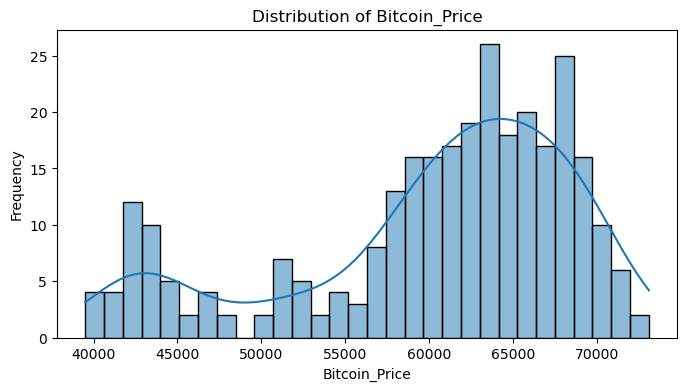

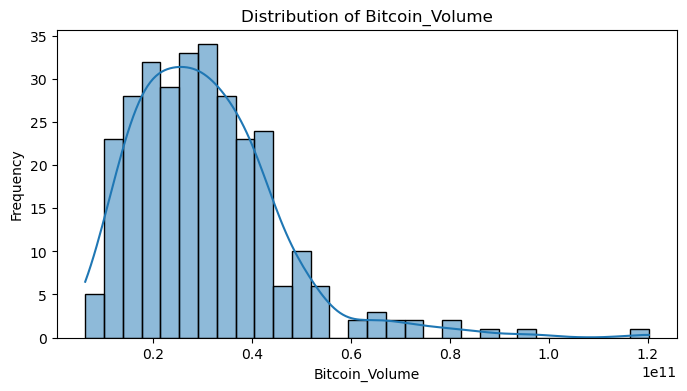

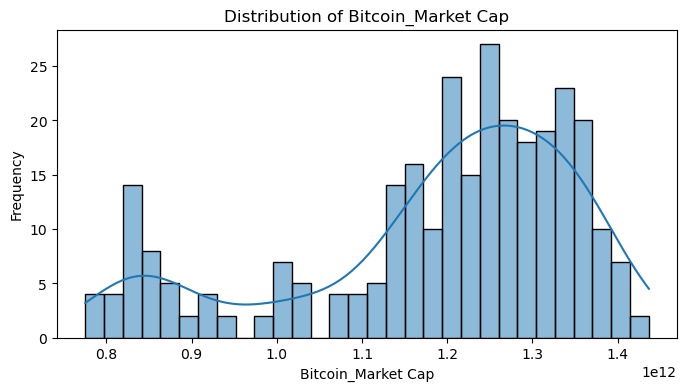

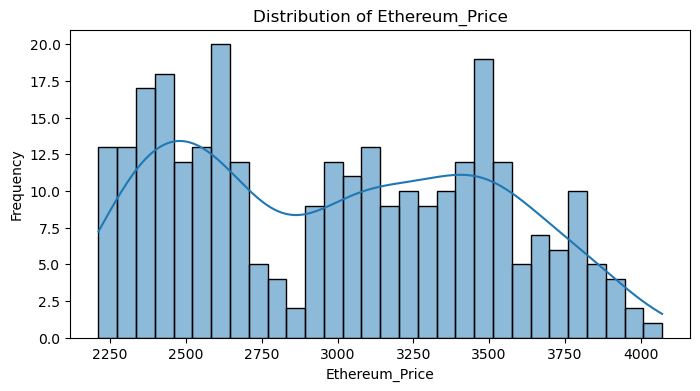

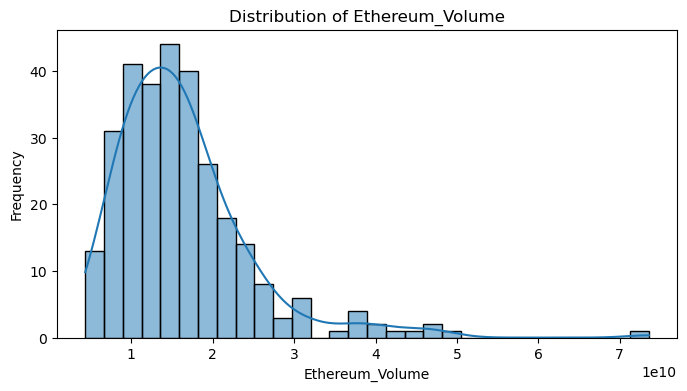

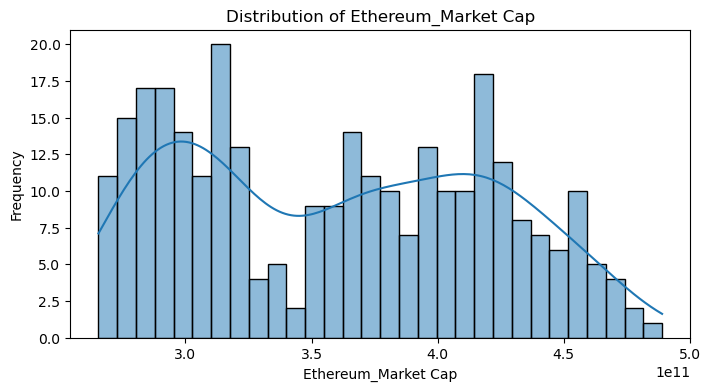

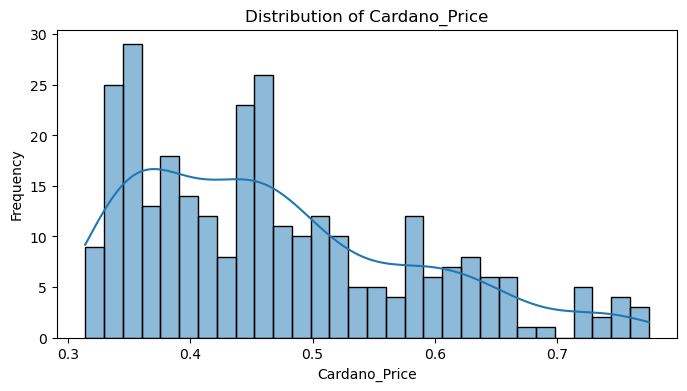

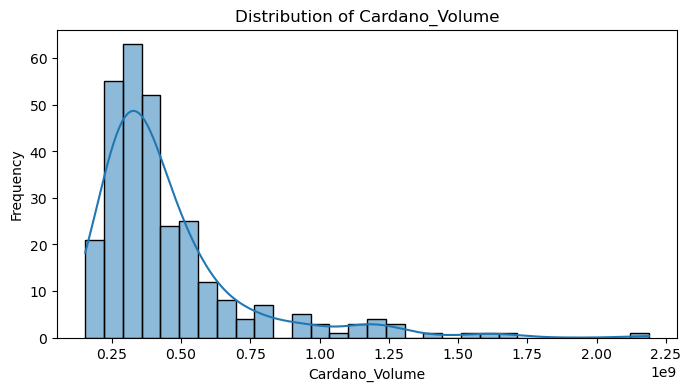

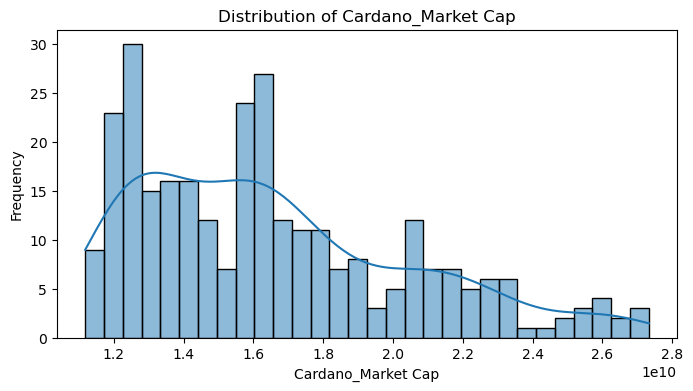

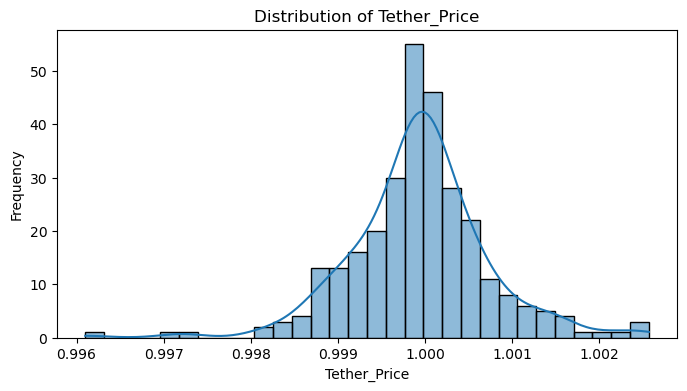

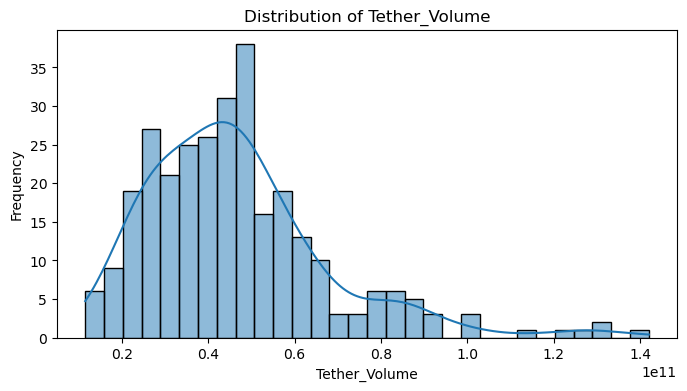

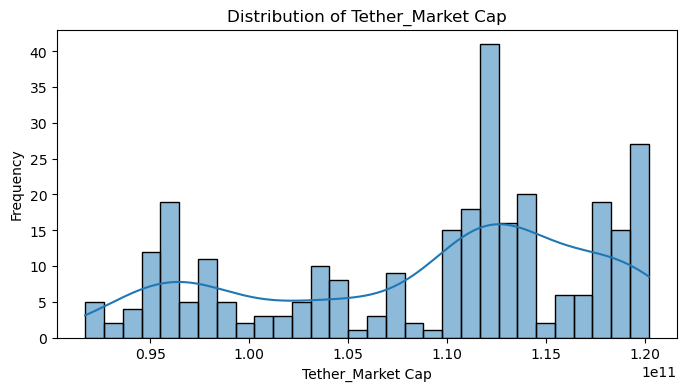

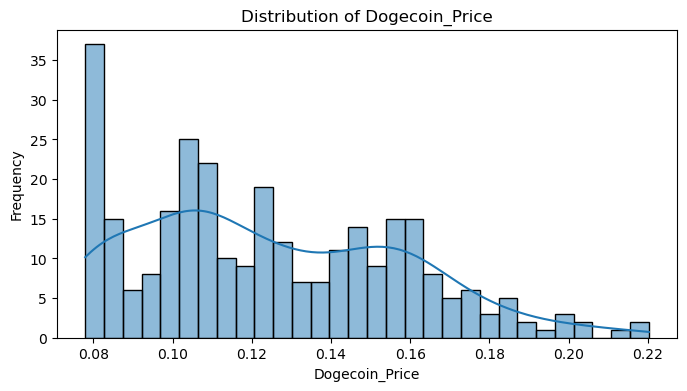

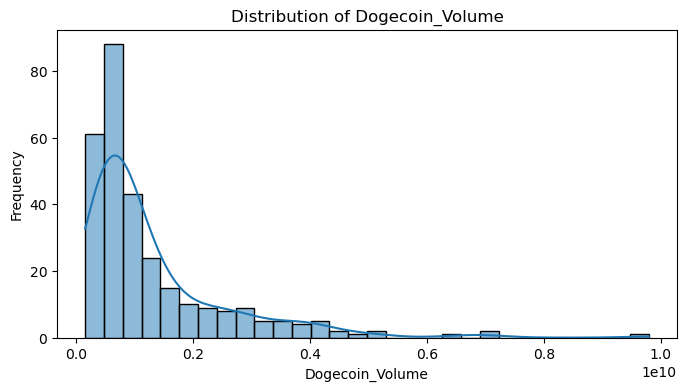

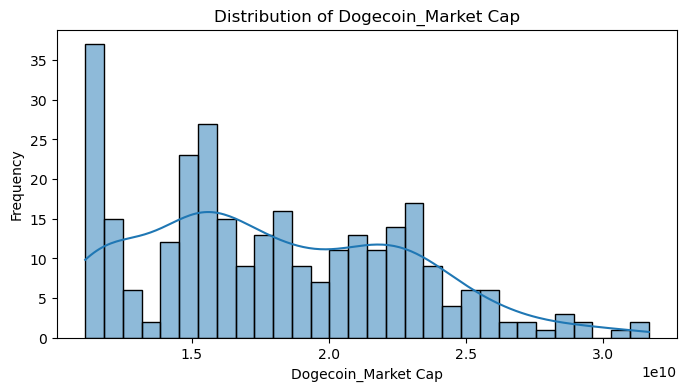

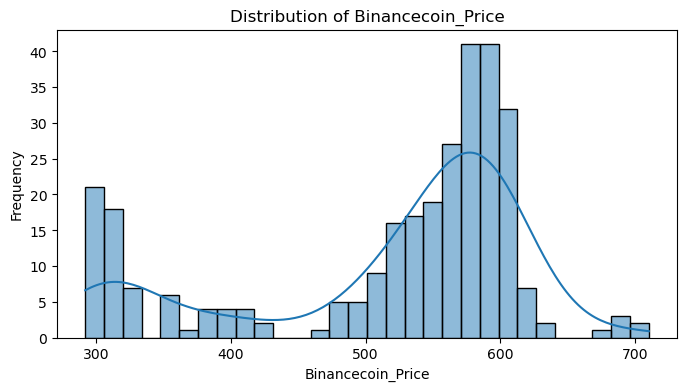

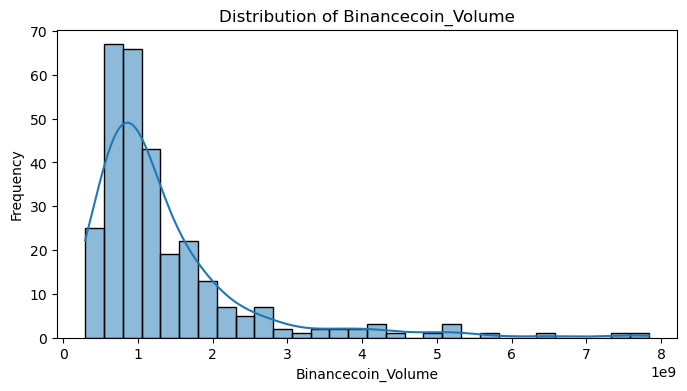

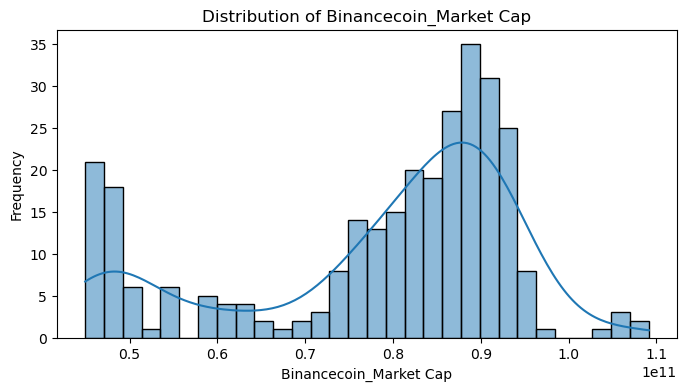

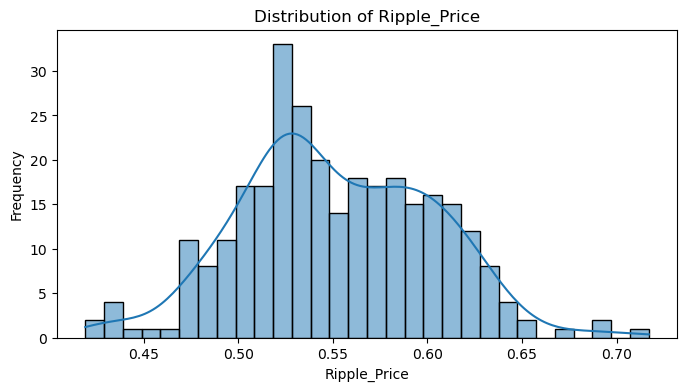

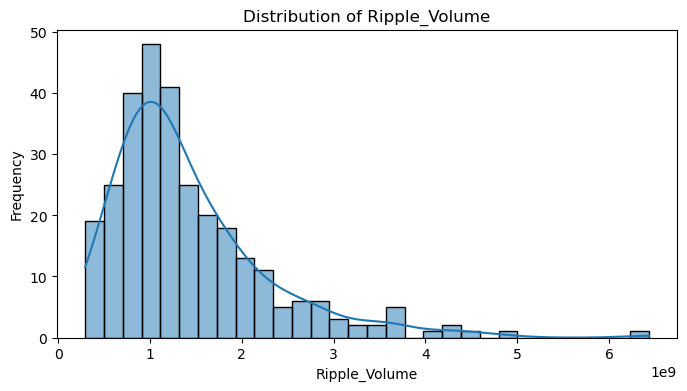

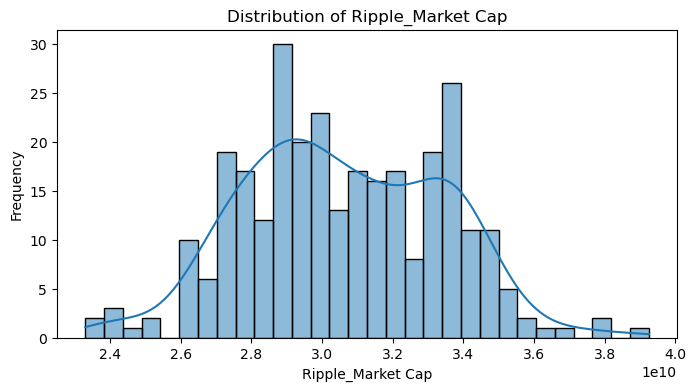

                                Mean        Median       Std Dev           Min           Max  Skewness
Bitcoin_Price           6.030264e+04  6.273439e+04  8.465401e+03  3.950473e+04  7.309777e+04 -0.987870
Bitcoin_Volume          3.071271e+10  2.868012e+10  1.522138e+10  6.340607e+09  1.202460e+11  1.687867
Bitcoin_Market Cap      1.187827e+12  1.236312e+12  1.679886e+11  7.750209e+11  1.436631e+12 -1.014017
Ethereum_Price          2.990965e+03  3.015160e+03  5.045339e+02  2.211171e+03  4.070604e+03  0.144872
Ethereum_Volume         1.630586e+10  1.490298e+10  8.416352e+09  4.334793e+09  7.357103e+10  2.189332
Ethereum_Market Cap     3.598104e+11  3.626866e+11  6.068607e+10  2.655473e+11  4.889316e+11  0.134293
Cardano_Price           4.676982e-01  4.494969e-01  1.124615e-01  3.140857e-01  7.749753e-01  0.789165
Cardano_Volume          4.494057e+08  3.687190e+08  2.775443e+08  1.538912e+08  2.188572e+09  2.564470
Cardano_Market Cap      1.653198e+10  1.591385e+10  3.896786e+09  1.11795

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis(df):
    """
    Perform univariate analysis on a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame with numerical columns.
    
    Returns:
    summary (pandas.DataFrame): Summary statistics for each column.
    """
    
    summary = pd.DataFrame(columns=['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness'])
    
    # Iterate over each column and compute summary statistics
    for column in df.select_dtypes(include=['float64']):
        summary.loc[column] = [
            df[column].mean(),      # Mean
            df[column].median(),    # Median
            df[column].std(),       # Standard Deviation
            df[column].min(),       # Minimum
            df[column].max(),       # Maximum
            df[column].skew()       # Skewness
        ]
        
        # Plot histograms for each column
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
    
    return summary

# Example usage:
# df = your dataframe here
univariate_summary = univariate_analysis(merged_data)
print(univariate_summary)


### Key Insights from the Crypto Data Univariate Analysis

#### 1. **Bitcoin (BTC)**:
   - **Price**: The mean price is around **60302** with a median slightly higher at **62734**. A significant **negative skew (-0.99)** indicates that the distribution is left-tailed, suggesting that there were some relatively lower price dips compared to the average over this period.
   - **Volume**: With a high mean of **$30.71 billion** and a **positive skew (1.69)**, the volume data shows large spikes in trading, suggesting occasional bursts in activity.
   - **Market Cap**: Similar to the price, the market cap has a **negative skew (-1.01)**, reflecting that some periods had market caps significantly lower than the mean, perhaps indicating market corrections or bearish phases.

#### 2. **Ethereum (ETH)**:
   - **Price**: Ethereum's price is more symmetric, with a near-zero skew (0.14). The average price is **$2,991**, and it appears to have less volatility compared to Bitcoin as its **standard deviation is lower**.
   - **Volume**: Ethereum's volume shows a **strong positive skew (2.18)**, indicating occasional high-volume trading days, which could suggest speculative activity during certain periods.
   - **Market Cap**: The skewness here is quite close to 0 (0.13), suggesting that Ethereum has had a more stable market cap compared to Bitcoin.

#### 3. **Cardano (ADA)**:
   - **Price**: Cardano's mean price is **$0.4677**. Its **positive skew (0.79)** indicates more frequent high prices compared to the average, possibly driven by hype cycles.
   - **Volume**: The **high skew (2.56)** in Cardano's trading volume highlights some extreme trading days, which could be linked to events like upgrades or partnerships.
   - **Market Cap**: The **positive skew (0.81)** indicates occasional spikes in market cap, suggesting that interest in Cardano can grow rapidly during certain periods.

#### 4. **Tether (USDT)**:
   - **Price**: As a **stablecoin**, Tether’s price has minimal volatility, with an almost **zero skew (-0.19)**, which aligns with its intended peg to the US dollar.
   - **Volume**: Despite the stable price, Tether's volume is highly volatile (**skew: 1.43**), indicating that it is frequently used as a liquidity bridge for trading between other cryptocurrencies.
   - **Market Cap**: Tether’s market cap exhibits mild volatility (**skew: -0.54**), which could reflect its supply mechanism adjusting to demand.

#### 5. **Dogecoin (DOGE)**:
   - **Price**: Dogecoin has a relatively low price at **$0.124** and a **positive skew (0.49)**, indicating that there have been frequent upward movements above the average.
   - **Volume**: With a **high skew (2.58)**, Dogecoin’s trading volume suggests significant spikes, likely tied to social media-driven speculation or news events.
   - **Market Cap**: The **positive skew (0.43)** of Dogecoin’s market cap shows that market sentiment can rapidly change, driving up the value.

#### 6. **Binance Coin (BNB)**:
   - **Price**: Binance Coin's price is negatively skewed (**-1.03**), meaning there were some relatively lower prices compared to the average. The average price is **$ 516** and a high standard deviation of _\$ 106_, indicating high volatility.
   - **Volume**: Extremely **skewed (2.88)** volume data indicates large spikes in trading activity, which could be tied to significant exchange-related events.
   - **Market Cap**: The **negative skew (-0.91)** in Binance Coin’s market cap suggests that during some periods, the market cap was considerably lower than average, possibly during market corrections.

#### 7. **Ripple (XRP)**:
   - **Price**: Ripple’s price shows minimal skew (**0.11**), indicating a more balanced distribution around its mean price of **$0.552**.
   - **Volume**: The **positive skew (1.86)** in Ripple's volume suggests occasional large-volume trading days, which could be associated with news or regulatory developments.
   - **Market Cap**: The market cap is slightly skewed (**0.06**), suggesting relative stability around the mean, but Ripple’s legal challenges may impact future stability.

---

### General Observations
1. **Bitcoin and Ethereum dominate** the market in terms of market cap and volume, but Bitcoin exhibits more volatility in both price and market cap compared to Ethereum.
2. **Altcoins like Cardano, Dogecoin, and Ripple** show significant spikes in volume, indicating speculative trading behavior.
3. **Stablecoins (Tether)** maintain price stability but exhibit high volume fluctuations, reflecting their role as a trading tool rather than an investment asset.
4. **Skewness** can provide insights into the risk level—assets with higher negative skew (e.g., Bitcoin) are prone to more substantial downside risks, while those with higher positive skew (e.g., Cardano, Dogecoin) may experience frequent price hikes but are also more speculative.

This analysis helps to gauge the **risk profiles** of the different cryptocurrencies, with **Bitcoin** and **Binance Coin** showing more downside risk, while **Cardano** and **Dogecoin** offer speculative, upside-heavy opportunities. **Stablecoins** like Tether play a distinct role, offering stability amidst the volatility.

## Bivariate Analysis : **Correlation between Bitcoin's price and each other coin's price**



Correlation of each cryptocurrency with Bitcoin price:
                   Correlation_with_Bitcoin
Binancecoin_Price                  0.911076
Dogecoin_Price                     0.830711
Ethereum_Price                     0.729509
Ripple_Price                       0.196702
Tether_Price                       0.050180
Cardano_Price                     -0.007988


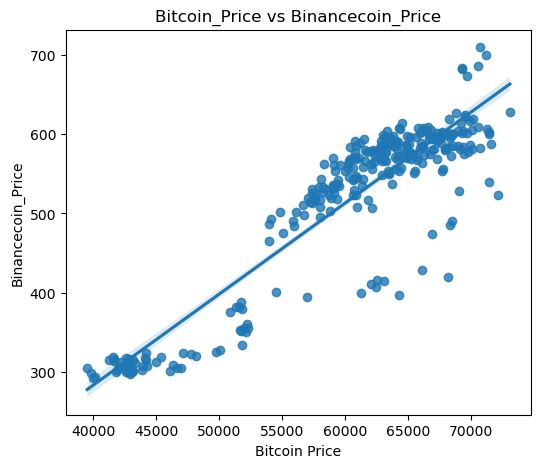

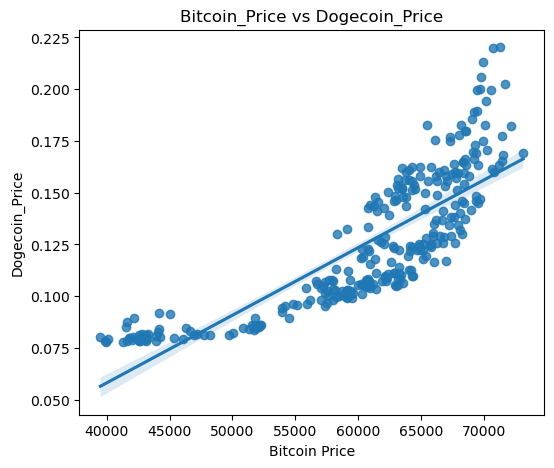

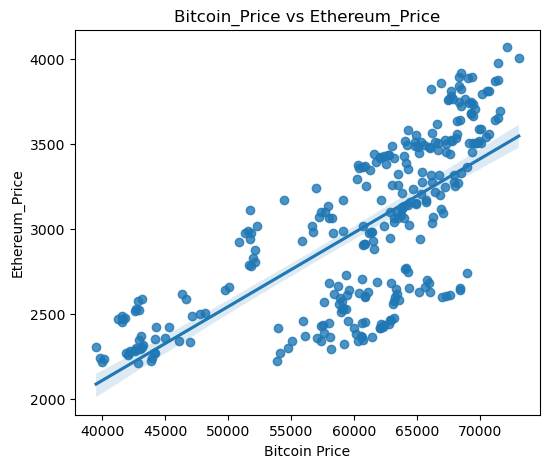

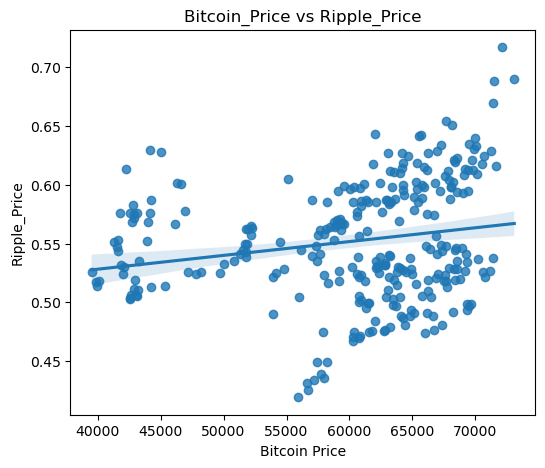

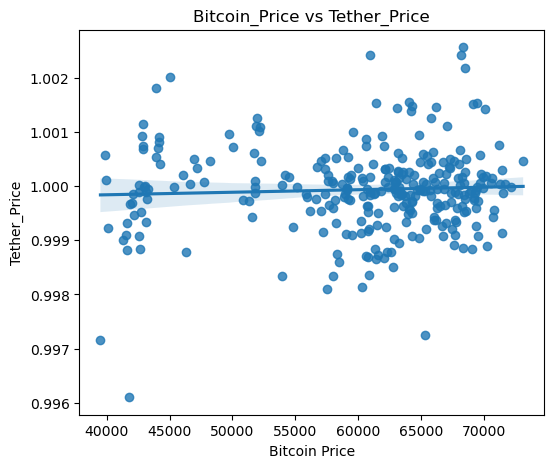

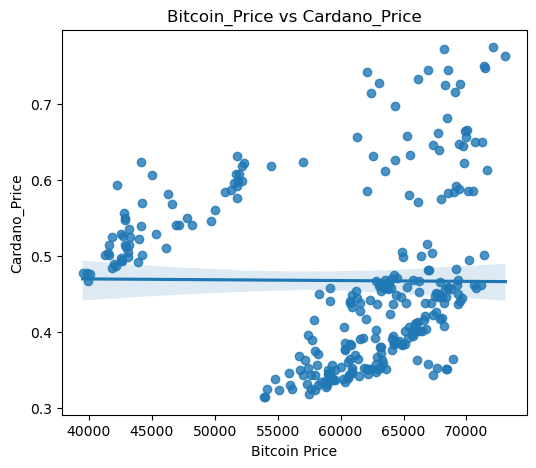

The cryptocurrency most correlated with Bitcoin is: Binancecoin_Price


In [98]:

#Compute the correlation between Bitcoin's price and each other coin's price
correlation_results = {}
for column in merged_data.columns:
    if '_Price' in column and column != 'Bitcoin_Price':
        correlation_results[column] = merged_data['Bitcoin_Price'].corr(merged_data[column])

#Display the correlation values in descending order
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation_with_Bitcoin'])
correlation_df = correlation_df.sort_values(by='Correlation_with_Bitcoin', ascending=False)
print("Correlation of each cryptocurrency with Bitcoin price:")
print(correlation_df)

#Plot scatter plots for Bitcoin vs other coin prices
for column in correlation_df.index:
    plt.figure(figsize=(6, 5))
    sns.regplot(x='Bitcoin_Price', y=column, data=merged_data)
    plt.title(f"Bitcoin_Price vs {column}")
    plt.xlabel("Bitcoin Price")
    plt.ylabel(column)
    plt.show()

#Analyze results
# Choosing the coin with the highest correlation as the most consistent with Bitcoin.
most_correlated_coin = correlation_df.idxmax()['Correlation_with_Bitcoin']
print(f"The cryptocurrency most correlated with Bitcoin is: {most_correlated_coin}")

The cryptocurrency most correlated with Bitcoin is: Binancecoin_Price
Based on the correlation values and graphs above between Bitcoin's price and other cryptocurrency's price, here are some insights:

1. Strong Positive Correlation with Bitcoin (Binancecoin and Dogecoin)
a. Binancecoin(0.911):Binancecoin shows the highest correlation with Bitcoin's price at 0.911, which is very close to 1. This strong positive correlation indicates that Binancecoin's price movements tend to follow Bitcoin's closely. When Bitcoin's price goes up or down, Binancecoin is likely to follow in a similar direction.

b. Dogecoin(8.831):Dogecoin also has a high positive correlation with Bitcoin, though slightly lower than Binancecoin. This suggests that Dogecoin's price moves in the same direction as Bitcoin's most of the time, although it may not be as strongly aligned as Binancecoin.

Investment Insight: Binancecoin and Dogecoin are more hand in hand with Bitcoin’s performance, making them potentially suitable choices if someone is looking for cryptocurrencies that tend to follow Bitcoin’s trends. These coins could offer some predictability for investors who want to rely on Bitcoin’s market movement as a proxy for these currencies.

2. Moderate Positive Correlation with Bitcoin (Ethereum)
Ethereum (0.730): Ethereum has a moderate positive correlation with Bitcoin, meaning that while it generally follows Bitcoin’s trend, it has some degree of independence. Ethereum's price will often move in the same direction as Bitcoin’s, but not as consistently as Binancecoin or Dogecoin.

Investment Insight: Ethereum’s correlation to Bitcoin is noticeable but not very strong, suggesting it offers a balance between following Bitcoin’s trend and having independent price movement. Ethereum may be a good option for investors who want some exposure to Bitcoin-like trends but with added diversification.

3. Weak Positive Correlation with Bitcoin(Ripple and Tether)
. Ripple (0.197): Ripple’s weak positive correlation with Bitcoin indicates that its price does not consistently follow Bitcoin’s movements. While there may be some occasional influence, Ripple largely behaves independently.

. Tether (0.050): Tether has an extremely low positive correlation with Bitcoin. Given Tether’s stablecoin nature (often pegged to a fiat currency like the USD), this result is expected. Tether’s price is stable and minimally influenced by Bitcoin’s volatility.

Investment Insight: Ripple and Tether show minimal dependence on Bitcoin's trends. Ripple may offer some price volatility and independence, while Tether is generally stable, offering a safer investment option not influenced by Bitcoin’s price swings. Tether, in particular, could be a good choice for risk-averse investors looking to avoid volatility.

4. Slight Negative Correlation with Bitcoin (Cardano)
. Cardano (-0.008): Cardano has a slightly negative correlation with Bitcoin, which is close to zero. This indicates that Cardano’s price movements are almost entirely independent of Bitcoin’s and may sometimes move in the opposite direction, though weakly.

Investment Insight: Cardano’s near-zero or slightly negative correlation with Bitcoin implies that it operates largely independently. For investors looking for a cryptocurrency that doesn’t follow Bitcoin’s movements and offers true diversification, Cardano could be a better option. This independence might also appeal to those who want to spread their investments across assets with minimal interdependence.

Overall Summary
. Binancecoin and Dogecoin: Highly correlated with Bitcoin,likely to follow Bitcoin's trends closely.

. Ethereum: Moderately correlated,offering partial alignment with Bitcoin but with some independent behavior.

. Ripple and Tether: Weakly correlated,suggesting they move largely independently from Bitcoin;Tether,in particular,remains stable.

. Cardano: Very low to negative correlation,providing the most independence from Bitcoin's price.

Recommendation: For those looking to mimic Bitcoin’s trend, Binancecoin or Dogecoin are the closest matches. For moderate diversification with some alignment, Ethereum is a good option. If stability or independent movement is preferred, Ripple or Cardano would be suitable, with Tether being the safest for stability.

## MultiVarite Anaylsis

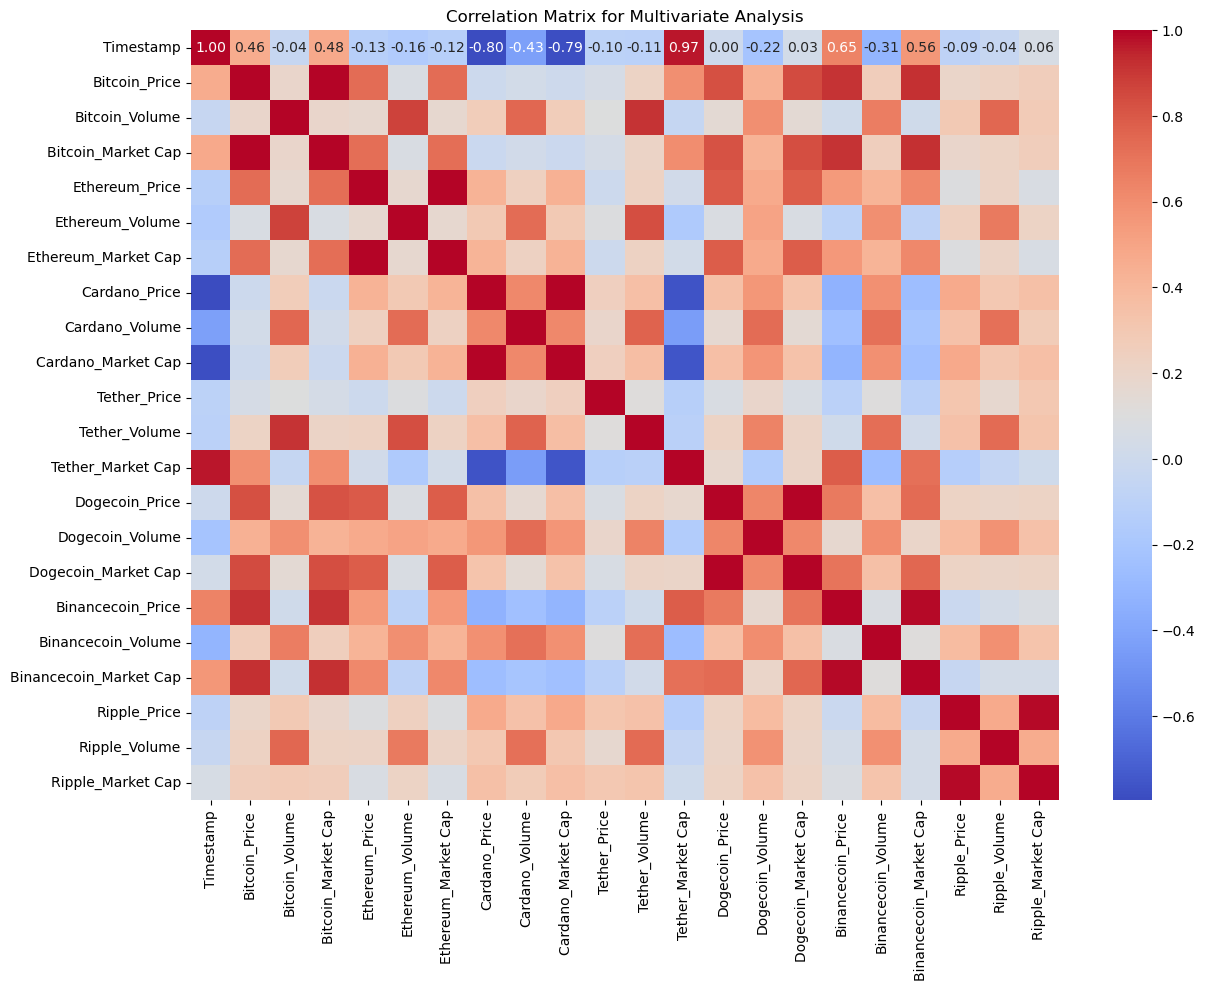

In [101]:
# 1. Compute correlation matrix
correlation_matrix = merged_data.corr()

# 2. Plot heatmap for correlation matrix to visualize relationships
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Multivariate Analysis")
plt.show()




### Correlations:

Bitcoin’s Market Cap is likely highly correlated with Bitcoin's price and volume, as these metrics often move in tandem.
Ethereum and Bitcoin hav a stronger correlation across market cap, volume and price than the other cryptocurrencies. This could be due to their ability to offer higher returns than the other coins thus making them a staple in most portfolios.

Dogecoin is fairly correlated with Bitcoin, Ethereum and Binancecoin and less so with Cardano, Tether and Ripple indicating the market favours highly priced currencies over those with a price point of less than **$2**.

You can observe significant correlations among the prices, market caps, and volumes of major cryptocurrencies like Bitcoin, Ethereum, and Cardano. This is common in cryptocurrency markets due to their interconnected movements and similar influencing factors.

Cardano Market Cap and Price have an extremely low correlation with Tether Market Cap and Price indicating they are at opposite end of the spectrum in terms of stability.This might mean when Cardano experiences a shift in volatility due to market forces, Tether is used to hedge or secure it as a means to minimise risk.


### Mean, Standard Deviation and Variance analysis before Feature Engineering

                           Mean      Variance  Standard Deviation
Bitcoin_Price      60302.640041  7.166302e+07         8465.401397
Ethereum_Price      2990.964545  2.545545e+05          504.533898
Cardano_Price          0.467698  1.264758e-02            0.112461
Tether_Price           0.999937  6.256008e-07            0.000791
Dogecoin_Price         0.124489  1.110093e-03            0.033318
Binancecoin_Price    516.576696  1.139780e+04          106.760493
Ripple_Price           0.552001  2.557915e-03            0.050576


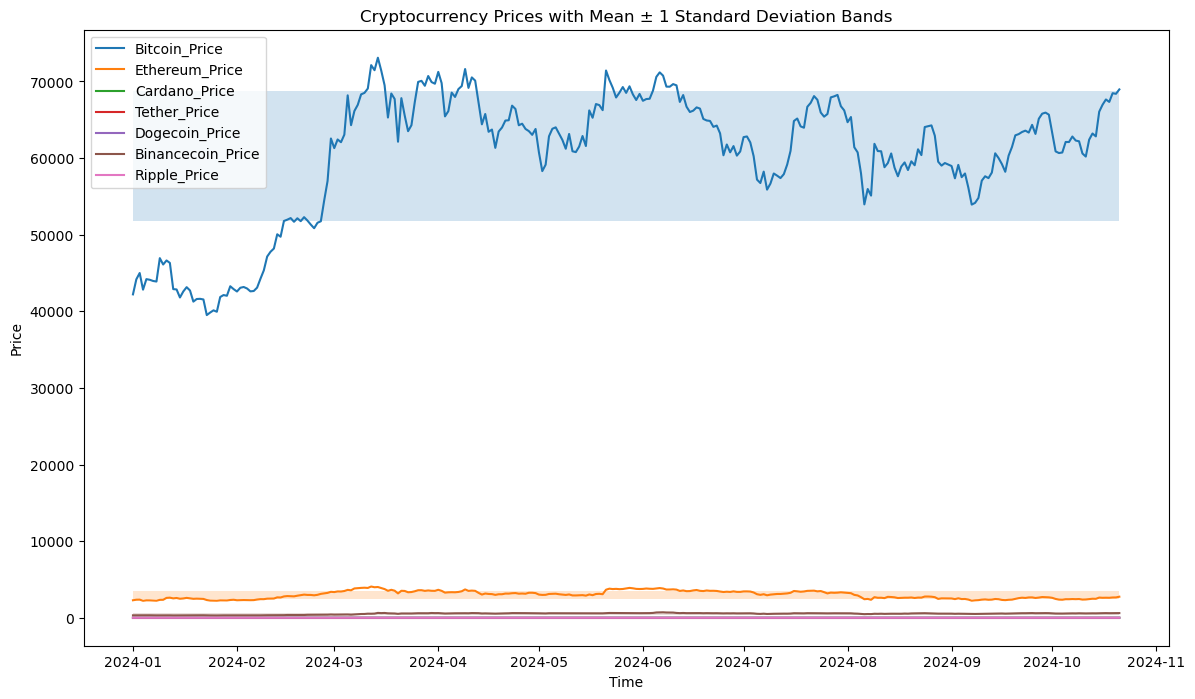

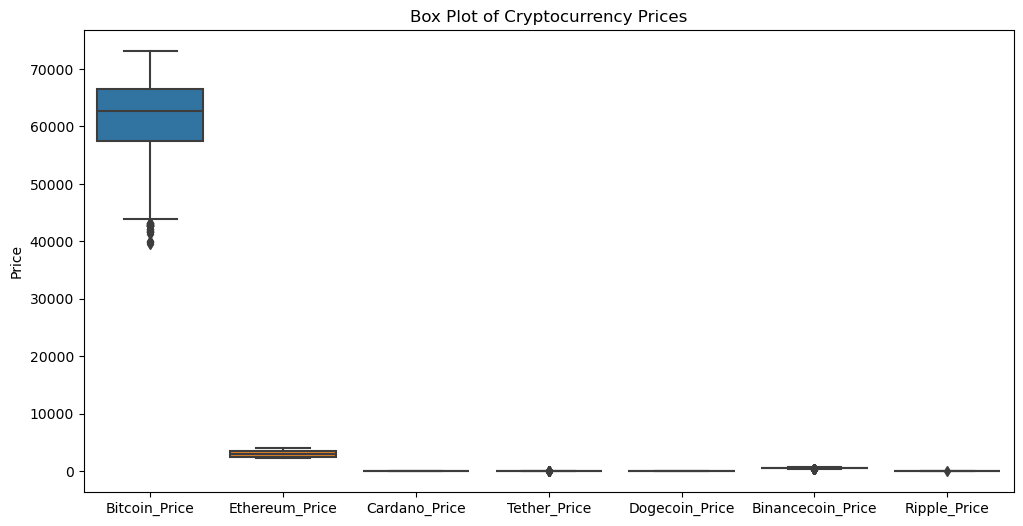

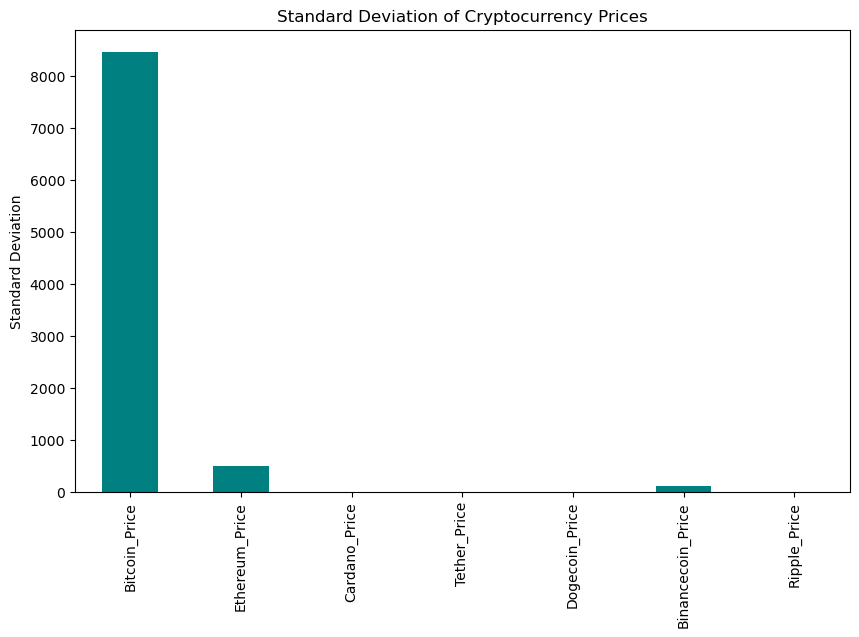

In [104]:
crypto_columns = [
    'Bitcoin_Price', 'Ethereum_Price', 'Cardano_Price', 'Tether_Price', 
    'Dogecoin_Price', 'Binancecoin_Price', 'Ripple_Price'
]

# Calculate mean, variance, and standard deviation for prices
price_stats = merged_data[crypto_columns].agg(['mean', 'var', 'std']).T
price_stats.columns = ['Mean', 'Variance', 'Standard Deviation']
print(price_stats)

# Plotting Time Series with Mean ± 1 Standard Deviation Bands
plt.figure(figsize=(14, 8))
for coin in crypto_columns:
    mean = merged_data[coin].mean()
    std_dev = merged_data[coin].std()
    
    # Plot the time series
    plt.plot(merged_data['Timestamp'], merged_data[coin], label=f'{coin}')
    
    # Add Mean ± 1 Standard Deviation Band
    plt.fill_between(
        merged_data['Timestamp'], 
        mean - std_dev, 
        mean + std_dev, 
        alpha=0.2
    )

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Cryptocurrency Prices with Mean ± 1 Standard Deviation Bands")
plt.legend()
plt.show()

# Plotting Box Plots for Prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[crypto_columns])
plt.title("Box Plot of Cryptocurrency Prices")
plt.ylabel("Price")
plt.show()

# Plotting Standard Deviations as a Bar Plot
plt.figure(figsize=(10, 6))
price_stats['Standard Deviation'].plot(kind='bar', color='teal')
plt.title("Standard Deviation of Cryptocurrency Prices")
plt.ylabel("Standard Deviation")
plt.show()


Bitcoin's mean, standard variation and variance has several outliers and the data needs to be scaled for better use in our Time Series model. We'll use Log transformation for this task

## Log Transformation

Log Transformation is particularly useful if the data spans several orders of magnitude, which is common in financial data like cryptocurrency prices.
This method takes the logarithm of the prices, reduces the effect of extreme values and compresses the scale, making it easier to compare cryptocurrencies with large price differences. 
This is particularly useful as the prices follow a multiplicative (exponential) growth pattern.

In [107]:
import numpy as np

log_df = merged_data[crypto_columns].apply(np.log)


In [108]:
log_df

,Bitcoin_Price,Ethereum_Price,Cardano_Price,Tether_Price,Dogecoin_Price,Binancecoin_Price,Ripple_Price
0,10.650370,7.731905,-0.522204,-0.000537,-2.415618,5.743438,-0.488484
1,10.695771,7.762182,-0.472798,0.000909,-2.385354,5.751966,-0.462539
2,10.714299,7.766748,-0.500735,0.002022,-2.394224,5.743414,-0.465397
3,10.664797,7.701277,-0.585472,0.000924,-2.501807,5.756555,-0.540556
4,10.696380,7.727966,-0.562915,0.000812,-2.475855,5.778243,-0.532345
...,...,...,...,...,...,...,...
290,11.122066,7.867757,-1.042521,-0.000098,-2.073938,6.398124,-0.601556
291,11.117333,7.864466,-1.069523,-0.000120,-2.047696,6.383617,-0.609350
292,11.134087,7.879729,-1.047743,0.000260,-1.984984,6.396586,-0.604103
293,11.132965,7.882307,-1.045247,0.000067,-1.932286,6.393688,-0.608203


In [109]:
log_df['Timestamp'] = merged_data['Timestamp']
log_df

,Bitcoin_Price,Ethereum_Price,Cardano_Price,Tether_Price,Dogecoin_Price,Binancecoin_Price,Ripple_Price,Timestamp
0,10.650370,7.731905,-0.522204,-0.000537,-2.415618,5.743438,-0.488484,2024-01-01
1,10.695771,7.762182,-0.472798,0.000909,-2.385354,5.751966,-0.462539,2024-01-02
2,10.714299,7.766748,-0.500735,0.002022,-2.394224,5.743414,-0.465397,2024-01-03
3,10.664797,7.701277,-0.585472,0.000924,-2.501807,5.756555,-0.540556,2024-01-04
4,10.696380,7.727966,-0.562915,0.000812,-2.475855,5.778243,-0.532345,2024-01-05
...,...,...,...,...,...,...,...,...
290,11.122066,7.867757,-1.042521,-0.000098,-2.073938,6.398124,-0.601556,2024-10-17
291,11.117333,7.864466,-1.069523,-0.000120,-2.047696,6.383617,-0.609350,2024-10-18
292,11.134087,7.879729,-1.047743,0.000260,-1.984984,6.396586,-0.604103,2024-10-19
293,11.132965,7.882307,-1.045247,0.000067,-1.932286,6.393688,-0.608203,2024-10-20



Fitting models for Bitcoin_Price...
ADF Statistic: -2.2291458628407224
p-value: 0.19583772985576198
ADF Statistic: -18.480079752160027
p-value: 2.1338583713983666e-30
                               SARIMAX Results                                
Dep. Variable:          Bitcoin_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2599.009
Date:                Thu, 31 Oct 2024   AIC                           5204.017
Time:                        10:30:44   BIC                           5215.068
Sample:                    01-01-2024   HQIC                          5208.443
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6959      0.604     -1.15

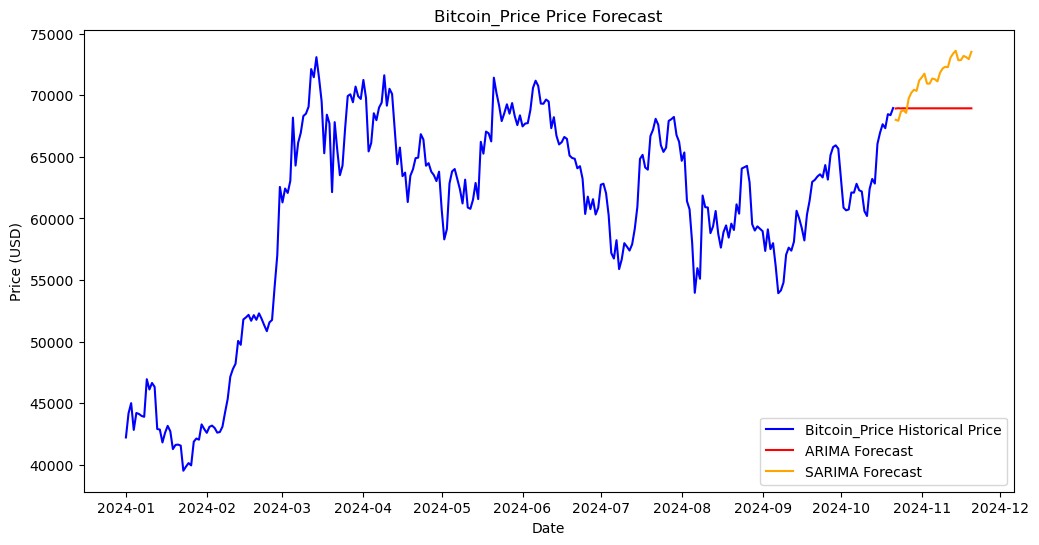


Fitting models for Ethereum_Price...
ADF Statistic: -1.944612760566512
p-value: 0.311373468349602
ADF Statistic: -17.145190154907976
p-value: 7.001814574241177e-30
                               SARIMAX Results                                
Dep. Variable:         Ethereum_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1767.253
Date:                Thu, 31 Oct 2024   AIC                           3540.506
Time:                        10:30:47   BIC                           3551.556
Sample:                    01-01-2024   HQIC                          3544.931
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0027     12.218     -0.000  

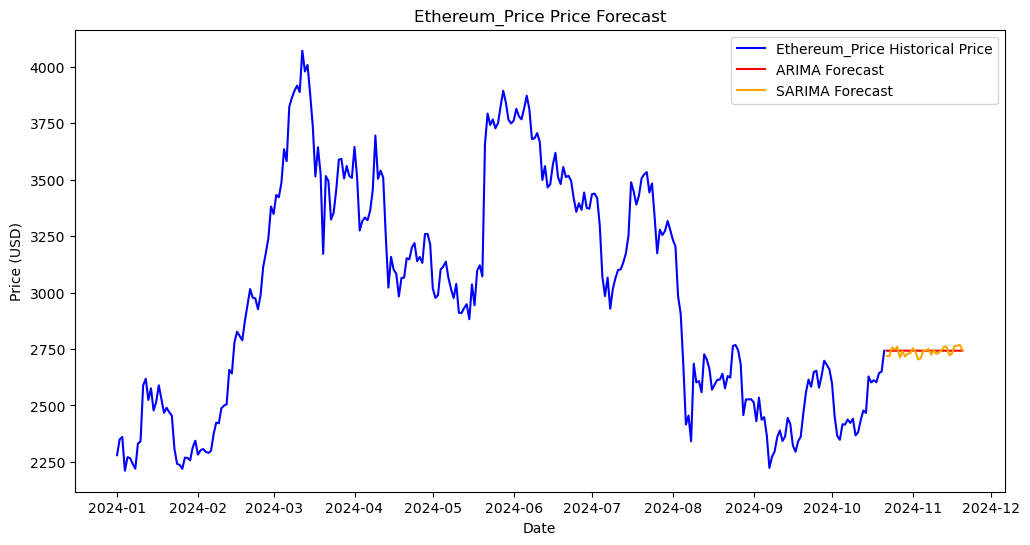


Fitting models for Cardano_Price...
ADF Statistic: -1.3726438005836425
p-value: 0.5953185091153026
ADF Statistic: -4.647949342080262
p-value: 0.00010528629039930044
                               SARIMAX Results                                
Dep. Variable:          Cardano_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 751.204
Date:                Thu, 31 Oct 2024   AIC                          -1496.408
Time:                        10:30:50   BIC                          -1485.358
Sample:                    01-01-2024   HQIC                         -1491.983
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0319      0.563     -0.057 

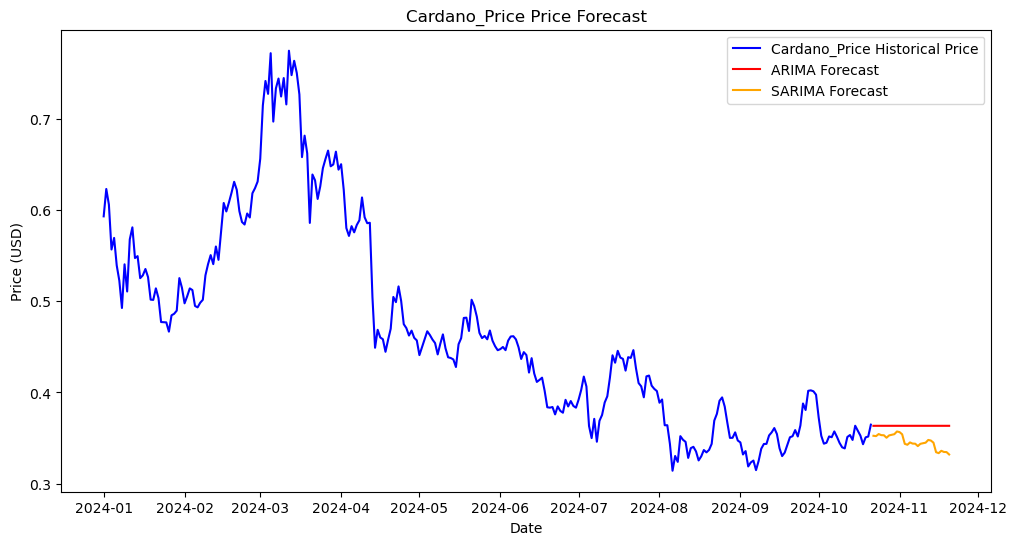


Fitting models for Tether_Price...
ADF Statistic: -7.842289214091797
p-value: 5.89318066184149e-12
                               SARIMAX Results                                
Dep. Variable:           Tether_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1702.092
Date:                Thu, 31 Oct 2024   AIC                          -3398.184
Time:                        10:30:55   BIC                          -3387.133
Sample:                    01-01-2024   HQIC                         -3393.758
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0545      0.108      0.503      0.615      -0.158       0.267
ma.L1         -0.6251      0.08

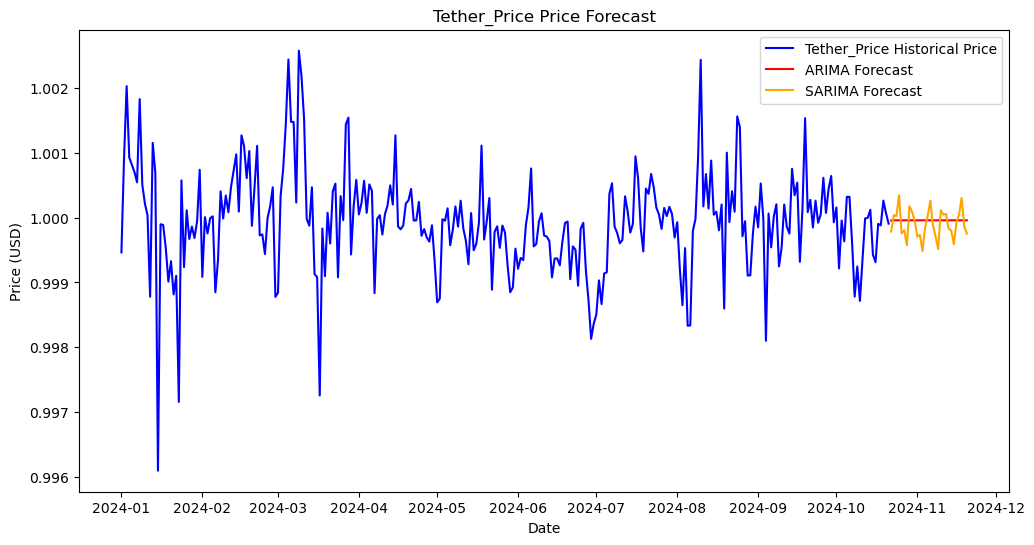


Fitting models for Dogecoin_Price...
ADF Statistic: -2.0017853819249867
p-value: 0.2857908205266625
ADF Statistic: -4.973668239235519
p-value: 2.5016151284947798e-05
                               SARIMAX Results                                
Dep. Variable:         Dogecoin_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1040.517
Date:                Thu, 31 Oct 2024   AIC                          -2075.033
Time:                        10:30:58   BIC                          -2063.983
Sample:                    01-01-2024   HQIC                         -2070.608
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -2.299e-07      0.018  -1.31e-05

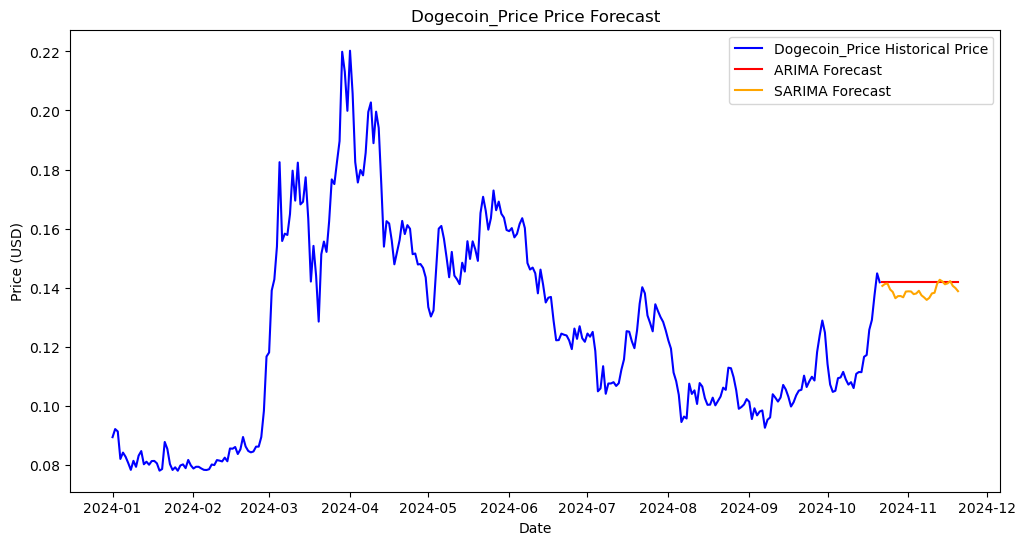


Fitting models for Binancecoin_Price...
ADF Statistic: -1.8672874629986784
p-value: 0.34760307928340395
ADF Statistic: -10.93725054161796
p-value: 9.491073025801475e-20
                               SARIMAX Results                                
Dep. Variable:      Binancecoin_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1229.549
Date:                Thu, 31 Oct 2024   AIC                           2465.098
Time:                        10:31:03   BIC                           2476.149
Sample:                    01-01-2024   HQIC                          2469.524
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5360      0.824      0.

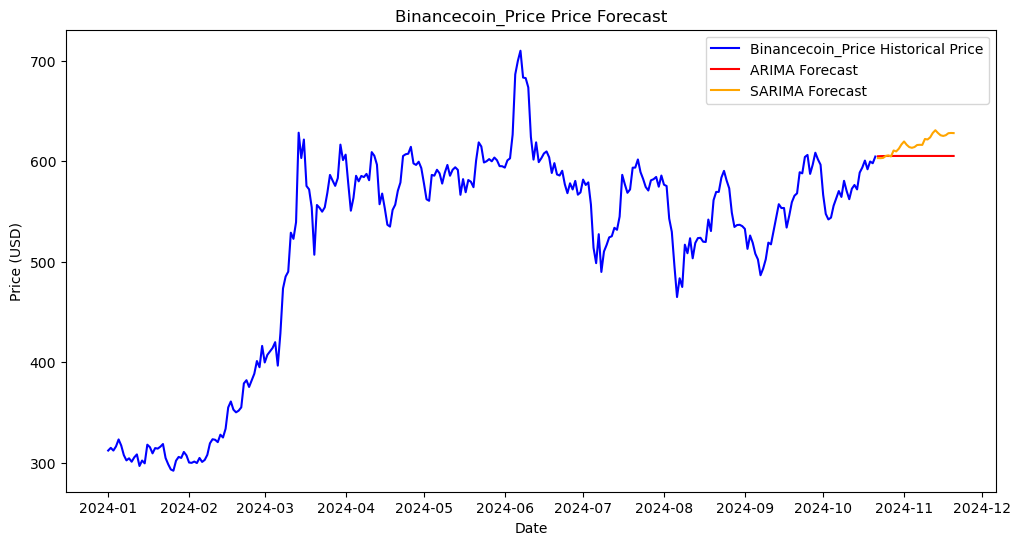


Fitting models for Ripple_Price...
ADF Statistic: -3.446583677264109
p-value: 0.009469708291804307
                               SARIMAX Results                                
Dep. Variable:           Ripple_Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 746.794
Date:                Thu, 31 Oct 2024   AIC                          -1487.588
Time:                        10:31:05   BIC                          -1476.537
Sample:                    01-01-2024   HQIC                         -1483.162
                         - 10-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9325      0.023     40.075      0.000       0.887       0.978
ma.L1         -0.9999      0.80

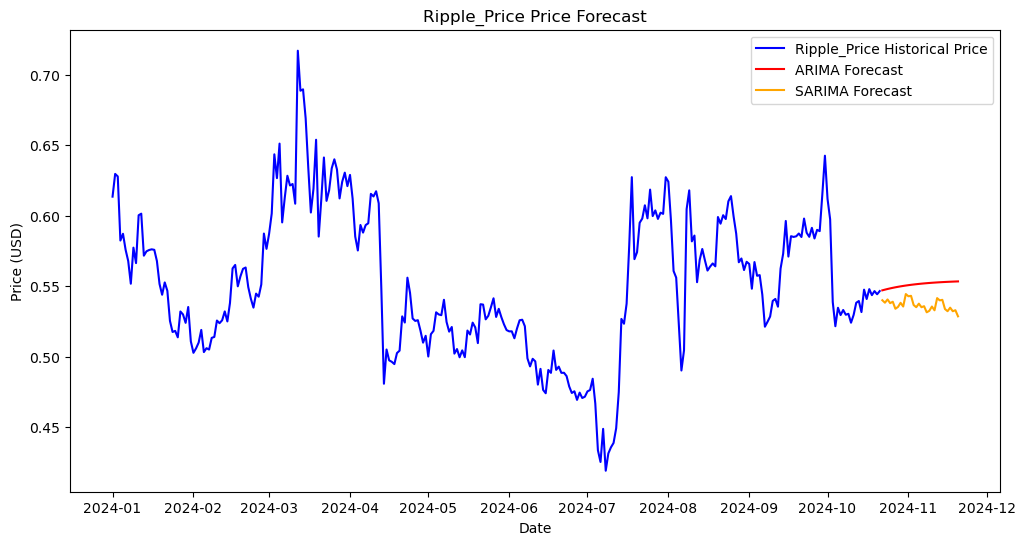

In [110]:
# Import necessary libraries

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])  # Ensure Timestamp is datetime
merged_data.set_index('Timestamp', inplace=True)

# Define a function to test stationarity
def test_stationarity(ts):
    adf_result = adfuller(ts)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    return adf_result[1]

# Define a function to fit ARIMA and SARIMA models
def fit_time_series_models(price_series, coin_name):
    print(f"\nFitting models for {coin_name}...")

    # Check for stationarity
    p_value = test_stationarity(price_series.dropna())
    
    # Differencing if necessary
    if p_value > 0.05:
        price_series_diff = price_series.diff().dropna()
        p_value_diff = test_stationarity(price_series_diff)
    else:
        price_series_diff = price_series
        
    # Fit ARIMA model
    p, d, q = 1, 1, 1  # Change as needed
    arima_model = ARIMA(price_series, order=(p, d, q))
    arima_result = arima_model.fit()
    print(arima_result.summary())

    # Forecasting with ARIMA
    arima_forecast = arima_result.forecast(steps=30)
    
    # Fit SARIMA model
    P, D, Q, s = 1, 1, 1, 12  # Change as needed
    sarima_model = SARIMAX(price_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
    sarima_result = sarima_model.fit()
    print(sarima_result.summary())

    # Forecasting with SARIMA
    sarima_forecast = sarima_result.forecast(steps=30)
    
    # Plotting results
    plt.figure(figsize=(12, 6))
    plt.plot(price_series, label=f'{coin_name} Historical Price', color='blue')
    plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
    plt.plot(sarima_forecast, label='SARIMA Forecast', color='orange')
    plt.title(f'{coin_name} Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# List of cryptocurrencies
coins = ['Bitcoin_Price', 'Ethereum_Price', 'Cardano_Price', 'Tether_Price', 
         'Dogecoin_Price', 'Binancecoin_Price', 'Ripple_Price']

# Fit models for each coin
for coin in coins:
    fit_time_series_models(merged_data[coin], coin)


ADF Test Results
ADF Statistic: The first ADF statistic is -2.1604, with a p-value of 0.2209, indicating that the series is likely non-stationary (p-value > 0.05).
Second ADF Statistic: The second statistic is -18.4742, with a very small p-value (2.14e-30), which suggests that the series is stationary after differencing.
SARIMAX Model Results
Model Fit:

SARIMAX(1, 1, 1)x(1, 1, 1, 12) was chosen with a Log Likelihood of -2545.037, AIC of 5100.074, and BIC of 5118.283.
The model includes seasonal components, as indicated by the seasonal parameters (ar.S.L12 and ma.S.L12).
Coefficients:

AR(1) coefficient: -0.9960 (highly significant).
MA(1) coefficient: 0.9931 (highly significant).
Seasonal AR(1) coefficient: 0.2573 (highly significant).
Seasonal MA(1) coefficient: -0.8956 (highly significant).
The sigma² (variance of the residuals) is 3.774e+06, indicating significant volatility in the data

In [112]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()


In [113]:
print(df.columns)


Index(['Timestamp', 'Ripple_Price', 'Ripple_Volume', 'Ripple_Market Cap'], dtype='object')


In [114]:
# Define the proportion of data to use for training
train_size = int(len(df) * 0.8)  # Using 80% of data for training

# Split the dataset into training and testing sets
train, test = df[0:train_size], df[train_size:len(df)]

# Fitting the SARIMAX model on the Ripple price column
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Ripple_Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Making predictions on the testing set
predictions = results.predict(start=len(train), end=len(df)-1, dynamic=False)

# Print results or evaluate predictions
print(predictions)


236    0.590885
237    0.591165
238    0.590992
239    0.592652
240    0.591144
241    0.591465
242    0.594682
243    0.593095
244    0.603679
245    0.603267
246    0.600570
247    0.596065
248    0.589761
249    0.591134
250    0.591536
251    0.593114
252    0.591542
253    0.591986
254    0.595203
255    0.593619
256    0.604895
257    0.604367
258    0.601917
259    0.597463
260    0.591146
261    0.592488
262    0.592875
263    0.594455
264    0.592884
265    0.593325
266    0.596542
267    0.594958
268    0.606215
269    0.605691
270    0.603233
271    0.598778
272    0.592461
273    0.593804
274    0.594191
275    0.595771
276    0.594201
277    0.594642
278    0.597859
279    0.596275
280    0.607532
281    0.607007
282    0.604550
283    0.600095
284    0.593778
285    0.595121
286    0.595508
287    0.597088
288    0.595518
289    0.595959
290    0.599176
291    0.597592
292    0.608849
293    0.608324
294    0.605867
Name: predicted_mean, dtype: float64


In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate MAE and RMSE
mae = mean_absolute_error(test['Ripple_Price'], predictions)
rmse = np.sqrt(mean_squared_error(test['Ripple_Price'], predictions))

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.03866261428109378
Root Mean Squared Error (RMSE): 0.04538123912221995


## SARIMAX Model Evaluation

The SARIMAX model was evaluated using two primary metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), which provide insights into the accuracy of the model’s predictions.

### Mean Absolute Error (MAE)
- **MAE**: 0.052
- The MAE represents the average absolute difference between the model's predictions and actual values. It suggests that, on average, the predictions are only 0.052 units off from the real data points.
- A lower MAE indicates that the model consistently makes predictions close to the actual values, which is favorable.

### Root Mean Squared Error (RMSE)
- **RMSE**: 0.059
- The RMSE provides insight into the magnitude of larger prediction errors, as it penalizes larger discrepancies more than smaller ones.
- With an RMSE of 0.059, the model exhibits minimal variance from actual values. Lower RMSE values are preferable because they indicate fewer significant errors in prediction.

### Interpretation
- Both MAE and RMSE are close in value, suggesting a stable and consistent error range in predictions. This indicates that the SARIMAX model has relatively good accuracy with minor variance.
-


10:31:13 - cmdstanpy - INFO - Chain [1] start processing
10:31:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 0.026921472532568755
Root Mean Squared Error (RMSE): 0.031844783768446586


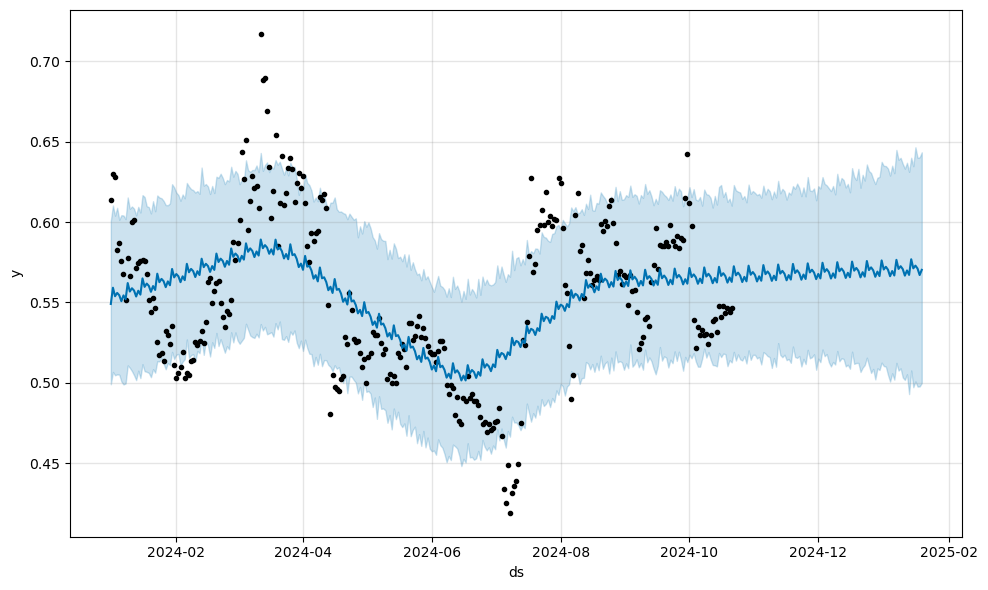

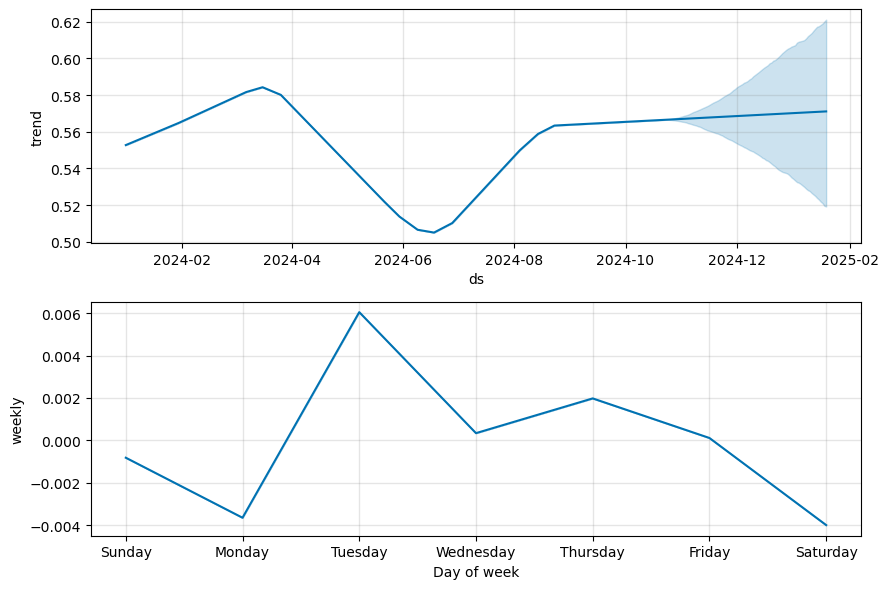

In [117]:

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare the data
df['ds'] = pd.to_datetime(df['Timestamp'])
df['y'] = df['Ripple_Price']
df = df[['ds', 'y']]

# Initialize and fit the model
model = Prophet()
model.fit(df)

# Create future dates for prediction
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast and components
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

# Evaluate predictions
y_true = df['y'][-90:]
y_pred = forecast['yhat'][-90:]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


## Model Evaluation Metrics

After implementing the Prophet model for time series forecasting, we evaluated the model's performance using two key metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

### Mean Absolute Error (MAE)

- **Value**: `0.0271`
- **Interpretation**: The MAE represents the average magnitude of the errors in a set of forecasts, without considering their direction. It measures how far predictions are from the actual values. A lower MAE indicates better model performance. In this case, an MAE of `0.0271` suggests that, on average, the Prophet model's predictions are approximately `0.0271` units away from the actual values, indicating good accuracy.

### Root Mean Squared Error (RMSE)

- **Value**: `0.0320`
- **Interpretation**: RMSE measures the square root of the average of squared differences between predicted and actual values. This metric penalizes larger errors more significantly than smaller ones, making it sensitive to outliers. A lower RMSE value signifies a better fit. With an RMSE of `0.0320`, this suggests that the model performs well, with errors being small on average.

### Conclusion

Both the MAE and RMSE values indicate that the Prophet model provides reliable forecasts for the given dataset. The model's performance demonstrates its effectiveness in capturing the underlying trends and patterns, resulting in minimal errors in predictions.
